<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/UNT-CSE-SpaceshipTitanic/blob/dev_avijeet/Spaceship_notebook_avijeet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages, libraries
import pandas as pd
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots



from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from google.colab import drive

In [2]:

### Connect with google drive
def connect_and_fetch_train():

  drive.mount('/content/drive')

  ### Train & Test csv dir

  train_file = "1aFLIETCp08ZRwvYj29MPeHokzltUywhv"
  test_file = "1wB9wtBDqedOlLeVfnaMY0b_oTXmu3rg4"


  train_dir = f'https://drive.google.com/uc?id={train_file}'
  return train_dir

def connect_and_fetch_test():
  drive.mount('/content/drive')

  ### Train & Test csv dir

  test_file = "1wB9wtBDqedOlLeVfnaMY0b_oTXmu3rg4"


  test_dir = f'https://drive.google.com/uc?id={test_file}'
  return test_dir



In [274]:
df_train = pd.read_csv(connect_and_fetch_train())
df_test = pd.read_csv(connect_and_fetch_test())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [275]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale



# Data Visualization

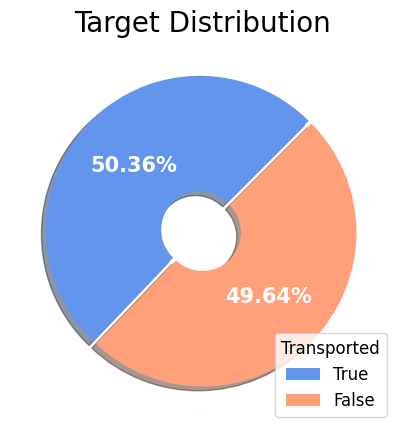

In [276]:
fig, ax = plt.subplots(figsize=(5,5))

labels = df_train["Transported"].value_counts().index
lst = df_train["Transported"].value_counts().to_list()
pie = ax.pie(lst, labels = labels, autopct='%.2f%%', textprops=dict(color="white", fontsize=15, weight="bold"), colors=["cornflowerblue", "lightsalmon"], shadow=True, wedgeprops=dict(width=0.75), startangle=45, explode=(0.025,0))

ax.set_title("Target Distribution", size=20)
ax.legend(title="Transported", title_fontsize=12, loc='best', fontsize=12)
plt.show()

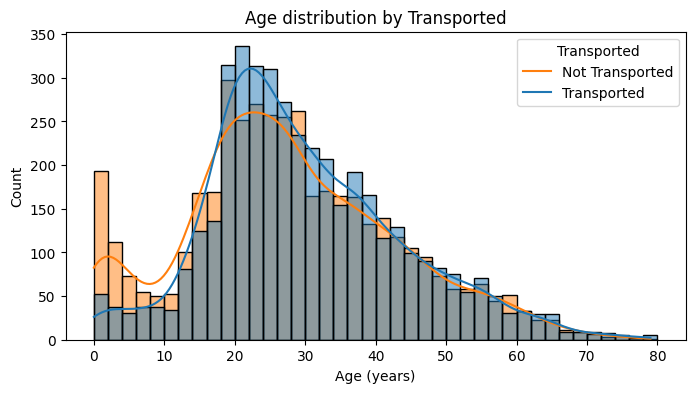

In [277]:
# Figure size
plt.figure(figsize=(8, 4))

# Histogram
sns.histplot(data=df_train, x='Age', hue='Transported', binwidth=2, kde=True)

# Aesthetics
plt.title('Age distribution by Transported')
plt.xlabel('Age (years)')
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
plt.show()


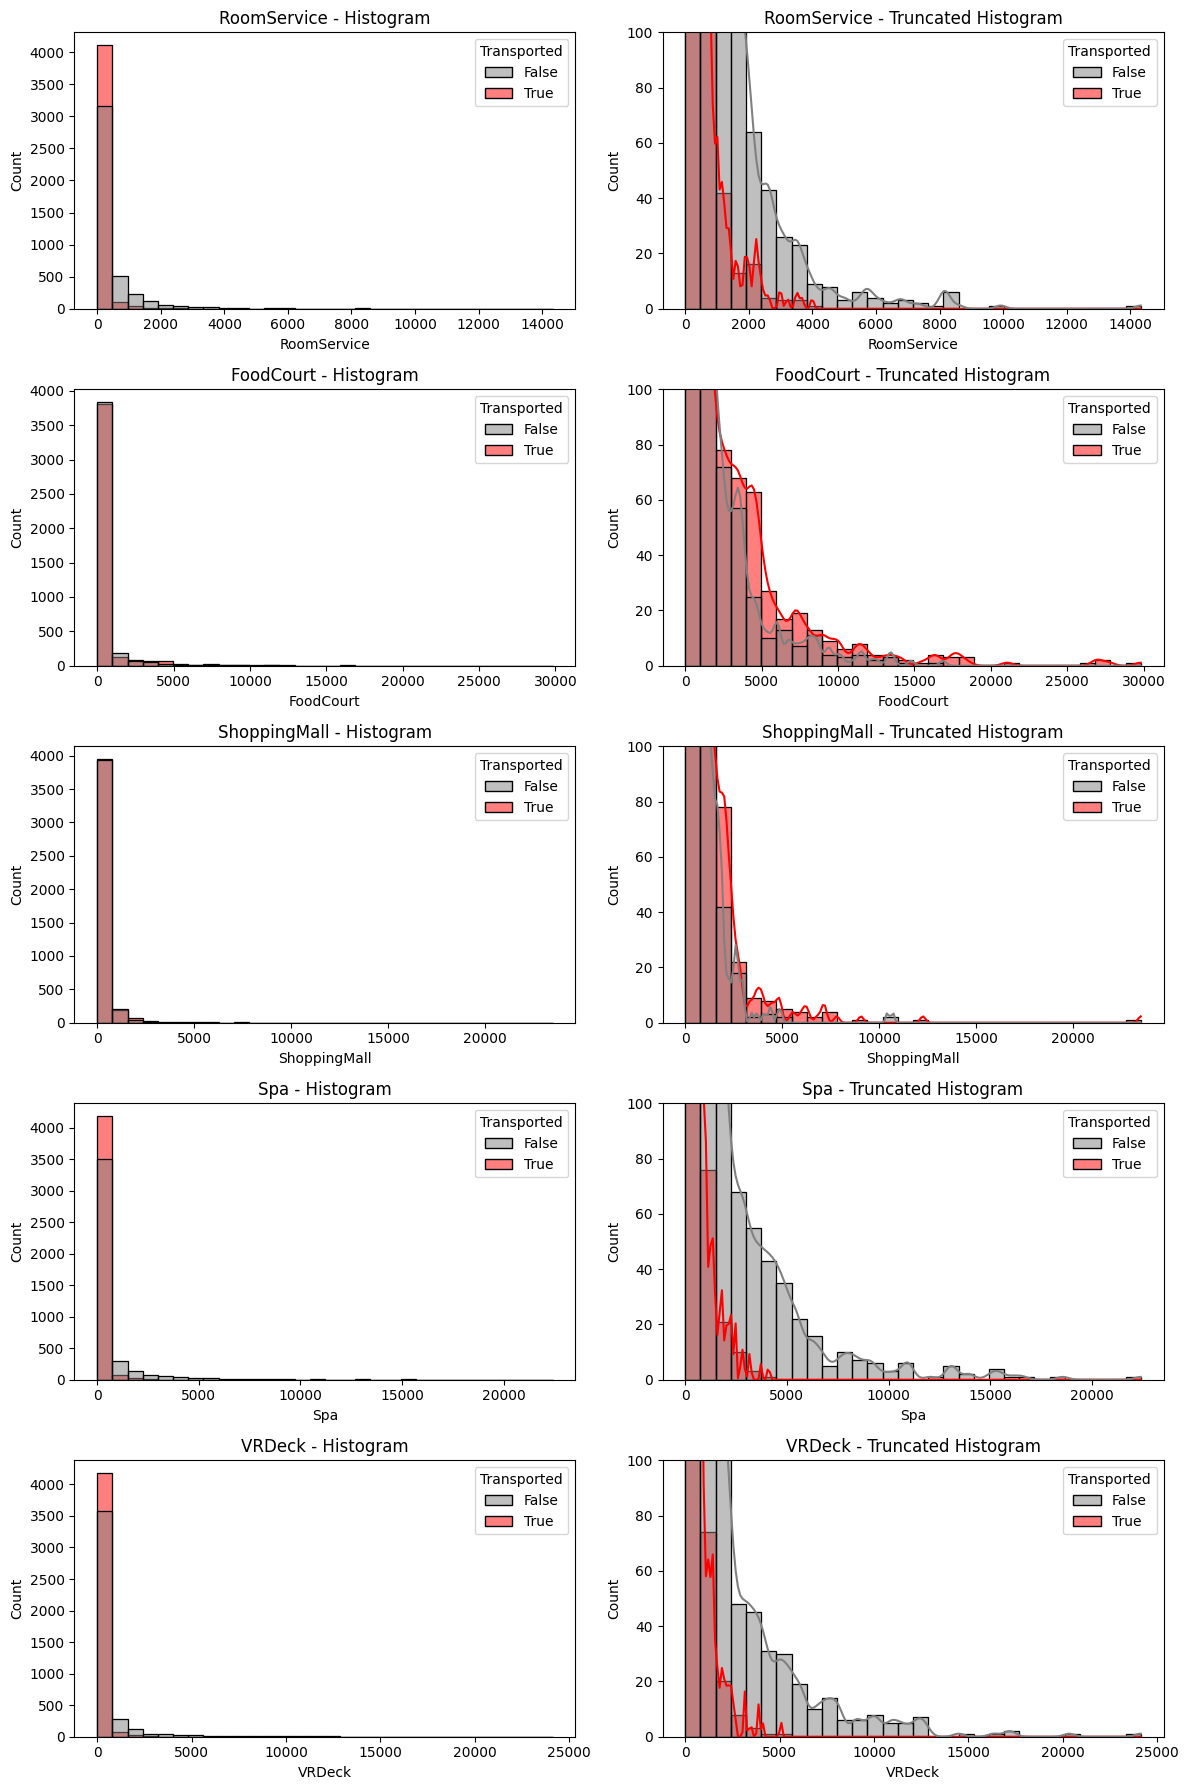

In [278]:
# Expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Create a plot
plt.figure(figsize=(12, 18))

# Define custom colors
custom_palette = ['grey', 'red']

for i, var_name in enumerate(exp_feats):
    # Create the left plot
    plt.subplot(5, 2, 2 * i + 1)

    # Plot a histogram with custom colors
    sns.histplot(data=df_train, x=var_name, bins=30, kde=False, hue='Transported', palette=custom_palette)

    # Set title
    plt.title(f'{var_name} - Histogram')

    # Create the right plot (truncated)
    plt.subplot(5, 2, 2 * i + 2)

    # Plot a truncated histogram with KDE and custom colors
    sns.histplot(data=df_train, x=var_name, bins=30, kde=True, hue='Transported', palette=custom_palette)

    # Set y-axis limit
    plt.ylim([0, 100])

    # Set title
    plt.title(f'{var_name} - Truncated Histogram')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()


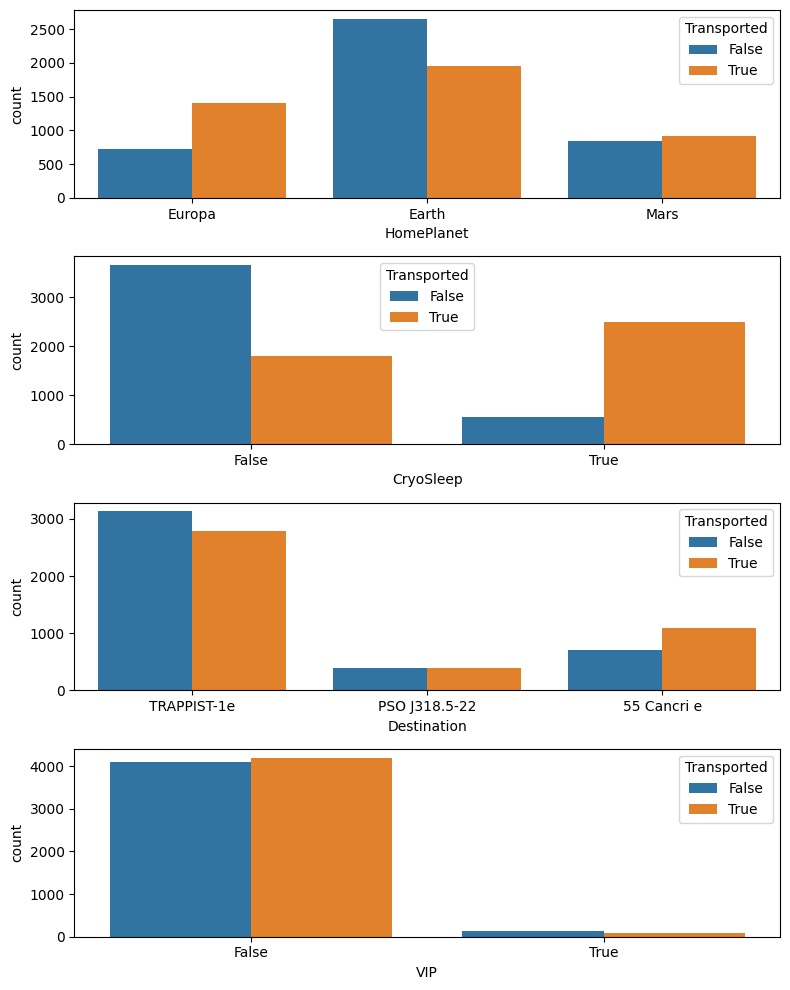

In [279]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(8,10))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df_train, x=var_name, axes=ax, hue='Transported')

fig.tight_layout()  # Improves appearance a bit
plt.show()

# Preprocessing


In [280]:
df_train['Name'].fillna('Unknown', inplace=True)
df_test['Name'].fillna('Unknown', inplace=True)

df_train['Surname'] = df_train['Name'].str.split(' ').str[1]
df_test['Surname'] = df_test['Name'].str.split(' ').str[1]

In [281]:

df_train['Family'] = df_train['PassengerId'].str.split('_').str[0]

df_test['Family'] = df_test['PassengerId'].str.split('_').str[0]

In [282]:
df_train['Surname'] = df_train.groupby(['Family'])['Surname'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df_test['Surname'] = df_test.groupby(['Family'])['Surname'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [283]:
def filling_null_by_feature(df, feature):


  # Filter rows with non-null feature
  non_null = df_train[df_train[feature].notnull()]

  # Create a dictionary mapping 'Family' to non-null 'feature' values
  family_feature_map = dict(zip(non_null['Family'], non_null[feature]))

  # Fill NaN values in feature using the mapped values
  df[feature] = df['Family'].map(family_feature_map)
  return df




In [284]:
# df_train = filling_null_by_feature(df_train, 'Cabin')
# df_test = filling_null_by_feature(df_test, 'Cabin')

In [285]:
# df_train = filling_null_by_feature(df_train, 'HomePlanet')
# df_train = filling_null_by_feature(df_train, 'Destination')



# df_test = filling_null_by_feature(df_test, 'HomePlanet')
# df_test = filling_null_by_feature(df_test, 'Destination')


In [286]:

# test['Family_size']=test['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])

In [287]:
df_train[~df_train['Cabin'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname,Family
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Ofracculy,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Vines,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Susent,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Susent,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Santantines,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Noxnuther,9276
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Mondalley,9278
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Connon,9279
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Hontichre,9280


In [288]:
def split_cabin(df):
  df[['deck','num','side']]=df['Cabin'].str.split('/',expand=True)

  return df

df_train = split_cabin(df_train)
df_test = split_cabin(df_test)


<Axes: xlabel='deck', ylabel='HomePlanet'>

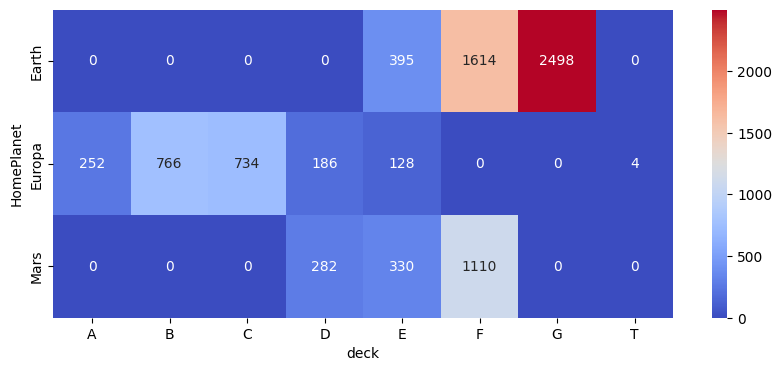

In [289]:
homePlanet_cabin=df_train.groupby(['deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(homePlanet_cabin.T, annot=True, fmt='g', cmap='coolwarm')


In [290]:
df_train.loc[df_train['deck'].isin(['A', 'B', 'C','T']), 'HomePlanet'] = 'Europa'
df_train.loc[df_train['deck']=='G', 'HomePlanet'] = 'Earth'
df_test.loc[df_test['deck'].isin(['A', 'B', 'C','T']), 'HomePlanet'] = 'Europa'
df_test.loc[df_test['deck']=='G', 'HomePlanet'] = 'Earth'


In [291]:
df_train[df_train['Destination'].isna()].groupby(['Family', 'Surname'])['Destination'].size().reset_index(name='MissingCount')

,Family,Surname,MissingCount
0,0045,Chmad,1
1,0138,Gambs,1
2,0152,Estron,1
3,0382,Floydendley,1
4,0462,Sosanturney,1
...,...,...,...
175,8956,Bonnondry,1
176,9130,Corte,1
177,9195,Purle,1
178,9197,Platch,1


In [292]:
# Some issues
# def missing_features_related_family(df, features):
#   for feature in features:
#     df[feature] = df.groupby(['Family'])[feature].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
#   return df
# df_train['HomePlanet'] = df_train.groupby(['Family'])['HomePlanet'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# df_test['HomePlanet'] = df_test.groupby(['Family'])['HomePlanet'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
# df_train['Cabin'] = df_train.groupby(['Family'])['Cabin'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# df_test['Cabin'] = df_test.groupby(['Family'])['Cabin'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# df_train['Destination'] = df_train.groupby(['Family'])['Destination'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# df_test['Destination'] = df_test.groupby(['Family'])['Destination'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [293]:
# # Filter rows with non-null 'HomePlanet'
# non_null_homeplanet = df_train[df_train['HomePlanet'].notnull()]

# # Create a dictionary mapping 'Family' to non-null 'HomePlanet' values
# family_homeplanet_map = dict(zip(non_null_homeplanet['Family'], non_null_homeplanet['HomePlanet']))

# # Fill NaN values in 'HomePlanet' using the mapped values
# df_train['HomePlanet'] = df_train['Family'].map(family_homeplanet_map)


# # Filter rows with non-null 'HomePlanet'
# non_null_homeplanet = df_test[df_test['HomePlanet'].notnull()]

# # Create a dictionary mapping 'Family' to non-null 'HomePlanet' values
# family_homeplanet_map = dict(zip(non_null_homeplanet['Family'], non_null_homeplanet['HomePlanet']))

# # Fill NaN values in 'HomePlanet' using the mapped values
# df_test['HomePlanet'] = df_test['Family'].map(family_homeplanet_map)



In [294]:
# # Filter rows with non-null 'HomePlanet'
# non_null_destination = df_train[df_train['Destination'].notnull()]

# # Create a dictionary mapping 'Family' to non-null 'HomePlanet' values
# family_destination_map = dict(zip(non_null_homeplanet['Family'], non_null_destination['Destination']))

# # Fill NaN values in 'HomePlanet' using the mapped values
# df_train['Destination'] = df_train['Family'].map(family_destination_map)


In [295]:
df_train['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [296]:

# Filter rows with non-null 'Cabin'
non_null_cabin = df_train[df_train['Cabin'].notnull()]

# Create a dictionary mapping 'Family' to non-null 'HomePlanet' values
family_cabin_map = dict(zip(non_null_cabin['Family'], non_null_cabin['Cabin']))

# Fill NaN values in 'HomePlanet' using the mapped values
df_train['Cabin'] = df_train['Family'].map(family_cabin_map)




In [297]:
df_train[df_train['Cabin'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname,Family,deck,num,side
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,Pooles,0012,NaN,NaN,NaN
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,Trad,0101,NaN,NaN,NaN
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,Resty,0239,NaN,NaN,NaN
272,0301_01,Earth,True,NaN,TRAPPIST-1e,16.0,False,0.0,0.0,0.0,0.0,0.0,Margia Wriggins,False,Wriggins,0301,NaN,NaN,NaN
280,0310_01,Europa,False,NaN,TRAPPIST-1e,67.0,False,NaN,230.0,0.0,4476.0,241.0,Naviton Coudered,False,Coudered,0310,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7847,8375_01,Earth,False,NaN,PSO J318.5-22,15.0,False,64.0,0.0,0.0,0.0,640.0,Carlen Valezaley,True,Valezaley,8375,NaN,NaN,NaN
7899,8437_01,Earth,False,NaN,PSO J318.5-22,36.0,False,52.0,0.0,132.0,334.0,176.0,Anny Tersony,False,Tersony,8437,NaN,NaN,NaN
8039,8603_01,Earth,True,NaN,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Hilip Klinson,False,Klinson,8603,NaN,NaN,NaN
8066,8623_01,Earth,False,NaN,TRAPPIST-1e,15.0,False,9.0,731.0,85.0,0.0,537.0,Vandy Hoffergess,False,Hoffergess,8623,NaN,NaN,NaN


In [298]:
label_cols = ["HomePlanet", "CryoSleep","deck","side", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train ,test = label_encoder(df_train,df_test ,label_cols)

In [299]:
df_train["side"].mode()

0    1
Name: side, dtype: int64

# Feature Engineering


In [300]:
def preprocessing_missing_value(df):
  df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
  df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
  df['RoomService'].fillna(df['RoomService'].min(), inplace=True)
  df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
  df['VIP'].fillna(df['VIP'].mode()[0],inplace = True)
  df['Age'].fillna(df['Age'].mode()[0],inplace = True)
  df['Spa'].fillna(df['Spa'].mean(), inplace = True)
  df['VRDeck'].fillna(df['VRDeck'].mean(), inplace = True)
  df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace = True)
  df['HomePlanet'].fillna(df['HomePlanet'].mode()[0],inplace = True)
  df['deck'].fillna(df['deck'].mode()[0],inplace = True)
  df['side'].fillna(df['side'].mode()[0],inplace = True)
  df['num'].fillna(df['num'].median(), inplace = True)
  df['num'] = df['num'].astype('int')
  return df

df_train = preprocessing_missing_value(df_train)
df_test = preprocessing_missing_value(df_test)


In [301]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scr=StandardScaler()
minn=MinMaxScaler()


def scaling(df):
  df["FoodCourt"]= minn.fit_transform(df[["FoodCourt"]])
  df["RoomService"]= minn.fit_transform(df[["RoomService"]])
  df["ShoppingMall"]= minn.fit_transform(df[["ShoppingMall"]])
  df["Spa"]= minn.fit_transform(df[["Spa"]])
  df["Age"]= minn.fit_transform(df[["Age"]])
  df["VRDeck"]= scr.fit_transform(df[["VRDeck"]])
  df["num"]= scr.fit_transform(df[["num"]])

  return df
df_train = scaling(df_train)
df_test = scaling(df_test)
# add new row

df_train


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname,Family,deck,num,side
0,0001_01,1,0,B/0/P,2,0.493671,0,0.000000,0.000000,0.000000,0.000000,-0.269023,Maham Ofracculy,False,Ofracculy,0001,1,-1.177238,0
1,0002_01,0,0,F/0/S,2,0.303797,0,0.007608,0.000302,0.001064,0.024500,-0.230194,Juanna Vines,True,Vines,0002,5,-1.177238,1
2,0003_01,1,0,A/0/S,2,0.734177,1,0.003001,0.119948,0.000000,0.299670,-0.225782,Altark Susent,False,Susent,0003,0,-1.177238,1
3,0003_02,1,0,A/0/S,2,0.417722,0,0.000000,0.043035,0.015793,0.148563,-0.098708,Solam Susent,False,Susent,0003,0,-1.177238,1
4,0004_01,0,0,F/1/S,2,0.202532,0,0.021149,0.002348,0.006428,0.025214,-0.267258,Willy Santantines,True,Santantines,0004,5,-1.175264,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,A/98/P,0,0.518987,1,0.000000,0.228726,0.000000,0.073322,-0.203720,Gravior Noxnuther,False,Noxnuther,9276,0,-0.983795,0
8689,9278_01,0,1,G/1499/S,1,0.227848,0,0.000000,0.000000,0.000000,0.000000,-0.269023,Kurta Mondalley,False,Mondalley,9278,6,1.781653,1
8690,9279_01,0,0,G/1500/S,2,0.329114,0,0.000000,0.000000,0.079687,0.000045,-0.269023,Fayey Connon,True,Connon,9279,6,1.783627,1
8691,9280_01,1,0,E/608/S,0,0.405063,0,0.000000,0.035186,0.000000,0.015753,2.585740,Celeon Hontichre,False,Hontichre,9280,4,0.022899,1


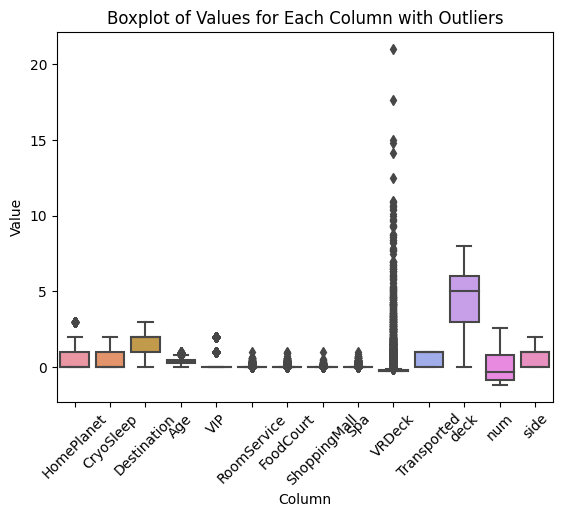

In [302]:

#plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [303]:
df_train[df_train['Age']<0]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname,Family,deck,num,side


In [304]:
#applying pca , here i want reduce to 4 columns to 2 columns which are roomservice foodcourt shoppingmall and spa.
from sklearn.decomposition import PCA
def reducecolpca(df):
  selected_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']
  data = df[selected_columns]
  n_components = 2  #number of new columns pca
  pca = PCA(n_components=n_components)
  principal_components = pca.fit_transform(data)
  pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
  df["pca_price"]=pc_df['PC1']
  df["pca_pricee"]=pc_df['PC2']
  return df

df_train = reducecolpca(df_train)
df_test = reducecolpca(df_test)
df_train.drop(['RoomService','FoodCourt','ShoppingMall','Spa'],axis=1,inplace=True)

In [305]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8693 non-null   object 
 1   HomePlanet   8693 non-null   int64  
 2   CryoSleep    8693 non-null   int64  
 3   Cabin        8594 non-null   object 
 4   Destination  8693 non-null   int64  
 5   Age          8693 non-null   float64
 6   VIP          8693 non-null   int64  
 7   VRDeck       8693 non-null   float64
 8   Name         8693 non-null   object 
 9   Transported  8693 non-null   bool   
 10  Surname      8589 non-null   object 
 11  Family       8693 non-null   object 
 12  deck         8693 non-null   int64  
 13  num          8693 non-null   float64
 14  side         8693 non-null   int64  
 15  pca_price    8693 non-null   float64
 16  pca_pricee   8693 non-null   float64
dtypes: bool(1), float64(5), int64(6), object(5)
memory usage: 1.1+ MB


In [306]:


# df_train.drop(['RoomService','FoodCourt','ShoppingMall','Spa'],axis=1,inplace=True)

In [307]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,VRDeck,Name,Transported,Surname,Family,deck,num,side,pca_price,pca_pricee
0,0001_01,1,0,B/0/P,2,0.493671,0,-0.269023,Maham Ofracculy,False,Ofracculy,0001,1,-1.177238,0,-0.020387,-0.014960
1,0002_01,0,0,F/0/S,2,0.303797,0,-0.230194,Juanna Vines,True,Vines,0002,5,-1.177238,1,-0.005536,0.001201
2,0003_01,1,0,A/0/S,2,0.734177,1,-0.225782,Altark Susent,False,Susent,0003,0,-1.177238,1,0.255494,0.070966
3,0003_02,1,0,A/0/S,2,0.417722,0,-0.098708,Solam Susent,False,Susent,0003,0,-1.177238,1,0.103240,0.031565
4,0004_01,0,0,F/1/S,2,0.202532,0,-0.267258,Willy Santantines,True,Santantines,0004,5,-1.175264,1,-0.003678,0.013039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,A/98/P,0,0.518987,1,-0.203720,Gravior Noxnuther,False,Noxnuther,9276,0,-0.983795,0,0.206472,-0.049637
8689,9278_01,0,1,G/1499/S,1,0.227848,0,-0.269023,Kurta Mondalley,False,Mondalley,9278,6,1.781653,1,-0.020387,-0.014960
8690,9279_01,0,0,G/1500/S,2,0.329114,0,-0.269023,Fayey Connon,True,Connon,9279,6,1.783627,1,-0.020526,-0.011429
8691,9280_01,1,0,E/608/S,0,0.405063,0,2.585740,Celeon Hontichre,False,Hontichre,9280,4,0.022899,1,0.017200,-0.018557


In [308]:
df_test.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Surname          51
Family            0
deck              0
num               0
side              0
pca_price         0
pca_pricee        0
dtype: int64

In [309]:
df_train.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin           99
Destination      0
Age              0
VIP              0
VRDeck           0
Name             0
Transported      0
Surname        104
Family           0
deck             0
num              0
side             0
pca_price        0
pca_pricee       0
dtype: int64

In [310]:
df_train.drop(["Surname","Name","Cabin"],axis=1,inplace=True)

In [311]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,VRDeck,Transported,Family,deck,num,side,pca_price,pca_pricee
0,0001_01,1,0,2,0.493671,0,-0.269023,False,0001,1,-1.177238,0,-0.020387,-0.014960
1,0002_01,0,0,2,0.303797,0,-0.230194,True,0002,5,-1.177238,1,-0.005536,0.001201
2,0003_01,1,0,2,0.734177,1,-0.225782,False,0003,0,-1.177238,1,0.255494,0.070966
3,0003_02,1,0,2,0.417722,0,-0.098708,False,0003,0,-1.177238,1,0.103240,0.031565
4,0004_01,0,0,2,0.202532,0,-0.267258,True,0004,5,-1.175264,1,-0.003678,0.013039


# Model Selection



In [312]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split


def split_data(df):
   X = df.drop(columns=['Transported','PassengerId'])
   y = df['Transported']
   X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)
   return X_train, X_test, y_train, y_test



In [313]:
def print_confusion_matrix(confusion_matrix):
  f, ax=plt.subplots(figsize=(5,5))
  sns.heatmap(confusion_matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
  plt.xlabel("y_pred")
  plt.ylabel("y_true")
  plt.show()



In [314]:
def models_on_training(X_train, y_train):
    # Train KNeighborsClassifier Model
    KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
    KNN_Classifier.fit(X_train, y_train)

    # Train LogisticRegression Model
    LGR_Classifier = LogisticRegression(n_jobs=-1)
    LGR_Classifier.fit(X_train, y_train)

    # Train Gaussian Naive Baye Model
    BNB_Classifier = BernoulliNB()
    BNB_Classifier.fit(X_train, y_train)

    # Train Decision Tree Model
    DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
    DTC_Classifier.fit(X_train, y_train)

    # Train RandomForest
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)


    models = []
    models.append(('Naive Baye Classifier', BNB_Classifier))
    models.append(('Decision Tree Classifier', DTC_Classifier))
    models.append(('KNeighborsClassifier', KNN_Classifier))
    models.append(('LogisticRegression', LGR_Classifier))
    models.append(('Random Forest', rf_classifier))


    for model_name, model in models:
        scores = cross_val_score(model, X_train, y_train, cv=10)
        accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
        confusion_matrix = metrics.confusion_matrix(y_train, model.predict(X_train))
        classification = metrics.classification_report(y_train, model.predict(X_train))
        print()
        print('============================== {} Model Evaluation =============================='.format(model_name))
        print()
        print("Cross Validation Mean Score:" "\n", scores.mean())
        print()
        print("Model Accuracy:" "\n", accuracy)
        print()
        print_confusion_matrix(confusion_matrix)
        print("Classification report:" "\n", classification)
        print()
    return models


In [322]:
def model_performance_in_test(models, X_test, y_test):
  for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print_confusion_matrix(confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


In [323]:
def pipeline(df):
  X_train, X_test, y_train, y_test = split_data(df)
  models = models_on_training(X_train, y_train)
  model_performance_in_test(models, X_test, y_test)



============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.7431673282064003

Model Accuracy:
 0.7431693989071039



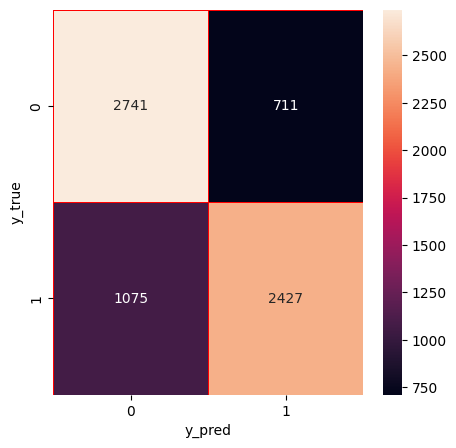

Classification report:
               precision    recall  f1-score   support

       False       0.72      0.79      0.75      3452
        True       0.77      0.69      0.73      3502

    accuracy                           0.74      6954
   macro avg       0.75      0.74      0.74      6954
weighted avg       0.75      0.74      0.74      6954



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.7479190440750847

Model Accuracy:
 0.9998561978717285



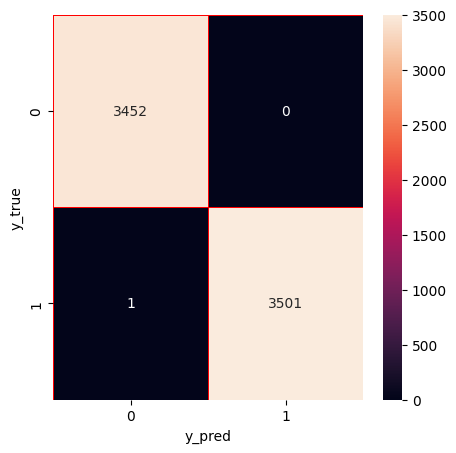

Classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      3452
        True       1.00      1.00      1.00      3502

    accuracy                           1.00      6954
   macro avg       1.00      1.00      1.00      6954
weighted avg       1.00      1.00      1.00      6954



============================== KNeighborsClassifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.5352263706276359

Model Accuracy:
 0.7063560540696002



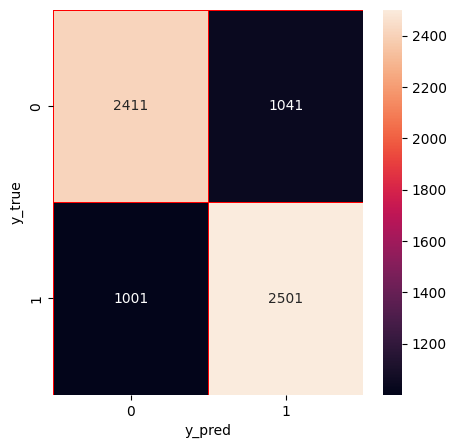

Classification report:
               precision    recall  f1-score   support

       False       0.71      0.70      0.70      3452
        True       0.71      0.71      0.71      3502

    accuracy                           0.71      6954
   macro avg       0.71      0.71      0.71      6954
weighted avg       0.71      0.71      0.71      6954



============================== LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.7185822376581494

Model Accuracy:
 0.7172850158182341



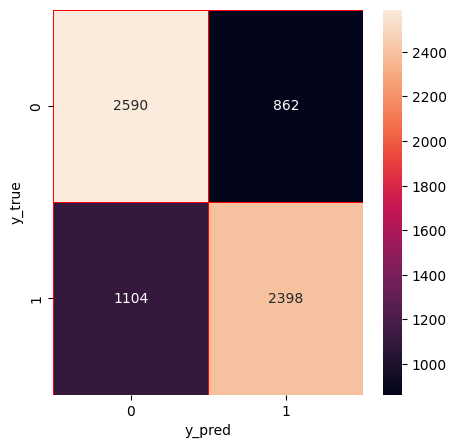

Classification report:
               precision    recall  f1-score   support

       False       0.70      0.75      0.72      3452
        True       0.74      0.68      0.71      3502

    accuracy                           0.72      6954
   macro avg       0.72      0.72      0.72      6954
weighted avg       0.72      0.72      0.72      6954



============================== Random Forest Model Evaluation ==============================

Cross Validation Mean Score:
 0.7943657487802862

Model Accuracy:
 0.9998561978717285



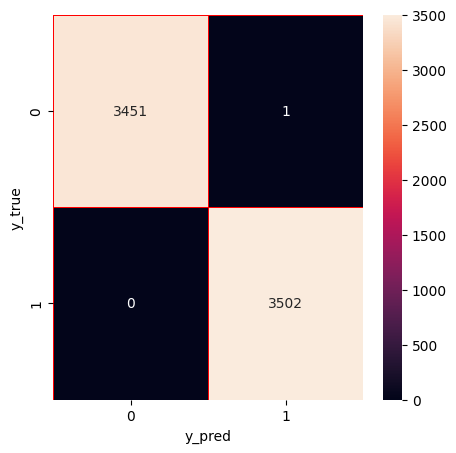

Classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      3452
        True       1.00      1.00      1.00      3502

    accuracy                           1.00      6954
   macro avg       1.00      1.00      1.00      6954
weighted avg       1.00      1.00      1.00      6954



============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.7429557216791259



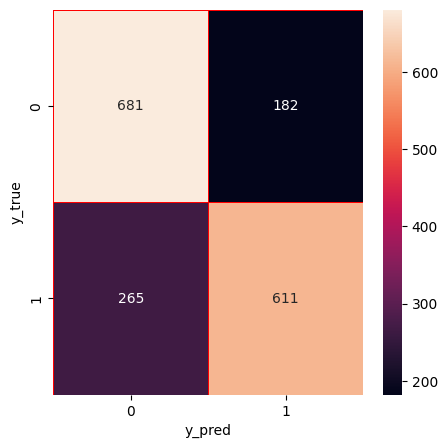


Classification report:
               precision    recall  f1-score   support

       False       0.72      0.79      0.75       863
        True       0.77      0.70      0.73       876

    accuracy                           0.74      1739
   macro avg       0.75      0.74      0.74      1739
weighted avg       0.75      0.74      0.74      1739



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.7326049453709028



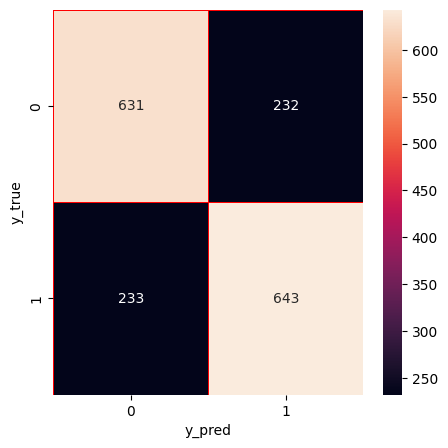


Classification report:
               precision    recall  f1-score   support

       False       0.73      0.73      0.73       863
        True       0.73      0.73      0.73       876

    accuracy                           0.73      1739
   macro avg       0.73      0.73      0.73      1739
weighted avg       0.73      0.73      0.73      1739



============================== KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.5135135135135135



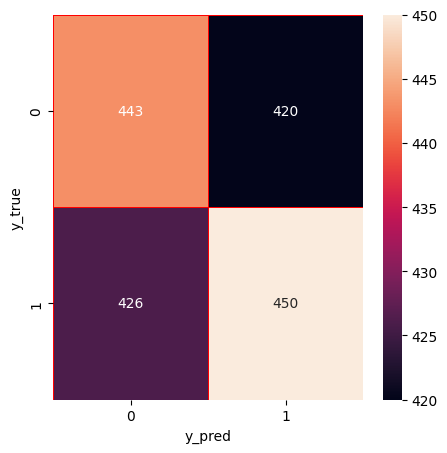


Classification report:
               precision    recall  f1-score   support

       False       0.51      0.51      0.51       863
        True       0.52      0.51      0.52       876

    accuracy                           0.51      1739
   macro avg       0.51      0.51      0.51      1739
weighted avg       0.51      0.51      0.51      1739



============================== LogisticRegression Model Test Results ==============================

Model Accuracy:
 0.7193789534215066



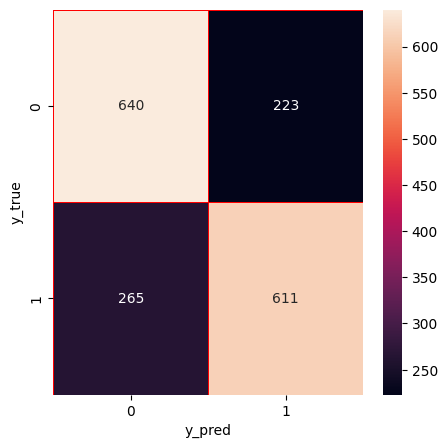


Classification report:
               precision    recall  f1-score   support

       False       0.71      0.74      0.72       863
        True       0.73      0.70      0.71       876

    accuracy                           0.72      1739
   macro avg       0.72      0.72      0.72      1739
weighted avg       0.72      0.72      0.72      1739



============================== Random Forest Model Test Results ==============================

Model Accuracy:
 0.7826336975273146



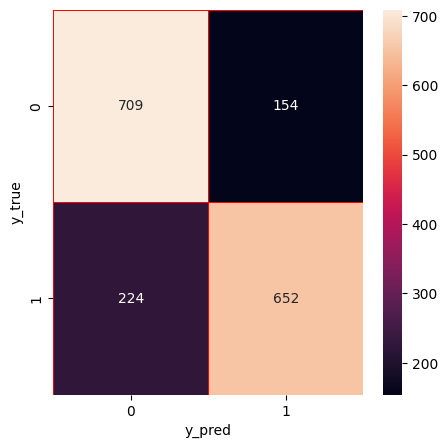


Classification report:
               precision    recall  f1-score   support

       False       0.76      0.82      0.79       863
        True       0.81      0.74      0.78       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739




In [324]:
pipeline(df_train)

In [320]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
model.predict()

# Saving the best model in pickle


In [319]:
# import pickle
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)
# with open('model.pickle', 'wb') as f:
#     pickle.dump(model, f)